In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset (replace with actual file path)
df = pd.read_csv("Global_Superstore2.csv", encoding="ISO-8859-1")  # or encoding="latin1"

# Data Cleaning
# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numeric columns with median
df.fillna("Unknown", inplace=True)  # Fill categorical columns with 'Unknown'

# Remove duplicates
df.drop_duplicates(inplace=True)

In [3]:
# Select only numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=['number'])

# Calculate Q1, Q3, and IQR
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition (only for numeric columns)
outlier_condition = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))

# Remove rows with outliers
df_cleaned = df[~outlier_condition.any(axis=1)]

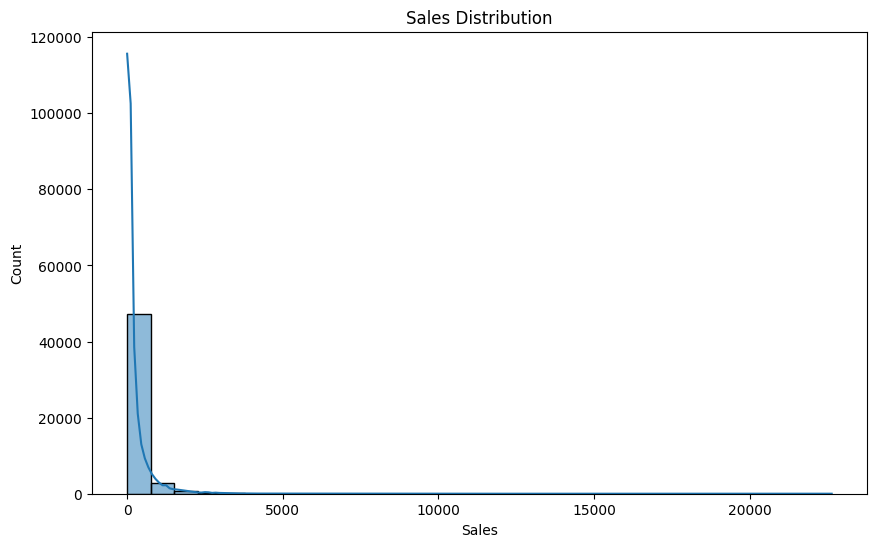

In [5]:
summary_stats = df.describe()
correlation_matrix = df.corr(numeric_only=True)

# Data Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.show()

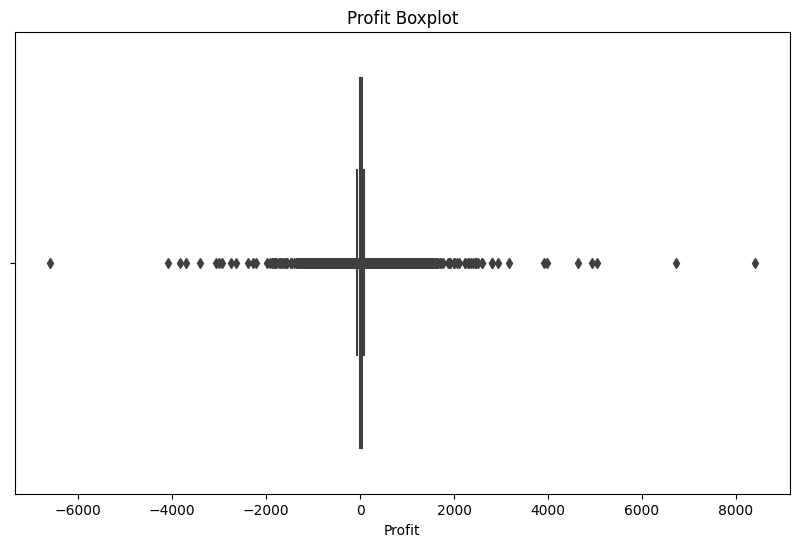

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Profit'])
plt.title('Profit Boxplot')
plt.show()

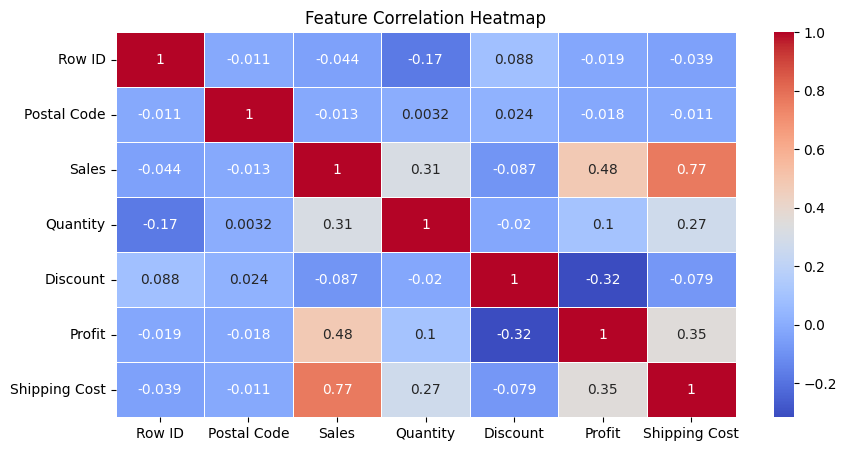

In [7]:
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
print("Summary Statistics:\n", summary_stats)
print("\nCorrelation Matrix:\n", correlation_matrix)

Summary Statistics:
             Row ID   Postal Code         Sales      Quantity      Discount   
count  51290.00000  51290.000000  51290.000000  51290.000000  51290.000000  \
mean   25645.50000  56188.859037    246.490581      3.476545      0.142908   
std    14806.29199  14161.549620    487.565361      2.278766      0.212280   
min        1.00000   1040.000000      0.444000      1.000000      0.000000   
25%    12823.25000  56430.500000     30.758625      2.000000      0.000000   
50%    25645.50000  56430.500000     85.053000      3.000000      0.000000   
75%    38467.75000  56430.500000    251.053200      5.000000      0.200000   
max    51290.00000  99301.000000  22638.480000     14.000000      0.850000   

             Profit  Shipping Cost  
count  51290.000000   51290.000000  
mean      28.610982      26.375915  
std      174.340972      57.296804  
min    -6599.978000       0.000000  
25%        0.000000       2.610000  
50%        9.240000       7.790000  
75%       36.8100

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
# Load dataset
df = pd.read_csv("sales_data.csv")

# Inspect the dataset
print("Dataset Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print("Data Types:\n", df.dtypes)

# Data Cleaning
# Remove duplicates
df.drop_duplicates(inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'sales_data.csv'

In [ ]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Exploratory Data Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Revenue')
plt.title('Sales Trend Over Time')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Unit_Cost', y='Profit')
plt.title('Profit vs Unit Cost')
plt.show()

plt.figure(figsize=(10, 5))
df.groupby('State')['Revenue'].sum().plot(kind='bar', color='skyblue')
plt.title('Total Sales by State')
plt.ylabel('Sales')
plt.show()

In [ ]:
# Predictive Modeling
features = df[['Profit', 'Unit_Price']]
target = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Model Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))